# 🔍 Optimisation du Clustering - Tests K=3 et K=5
## Amélioration du Silhouette Score et Analyse du Cluster 0

**Objectif :** Comparer différentes valeurs de K pour améliorer la qualité du clustering

**Problèmes identifiés avec K=4 :**
1. Silhouette Score faible (0.267)
2. Cluster 0 trop large (47.3% de la base - 1059 clients)
3. Potentiel de sous-segmentation du cluster "Économes Familiaux"

**Tests à réaliser :**
1. **K=3** : Simplifier la segmentation (meilleur Silhouette Score )
2. **K=5** : Mieux segmenter le Cluster 0
3. **Analyse approfondie** du Cluster 0 actuel

---

## 📦 Phase 1 : Imports et Chargement

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Bibliothèques importées")
print(f"📅 {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Bibliothèques importées
📅 2025-10-24 11:13:00


In [2]:
# Chargement des données
df = pd.read_csv('../01_Data/ML_DataSet.csv')

print("=" * 70)
print("CHARGEMENT DES DONNÉES")
print("=" * 70)
print(f"Shape : {df.shape}")
print(f"\n✅ Données chargées avec succès")

CHARGEMENT DES DONNÉES
Shape : (2237, 49)

✅ Données chargées avec succès


## 📊 Phase 2 : Préparation des Données (identique à ML_Clustering.ipynb)

In [3]:
# Sélectionner les features (mêmes que dans ML_Clustering.ipynb)
features_clustering = [
    # Démographiques
    'Revenu', 'Age_Inscription', 'Total_Enfants',
    
    # Comportement d'achat
    'Total_Depense', 'Total_Achats', 'Depense_Moy_Par_Achat',
    
    # Préférences produits
    'Achat_Vins', 'Achat_Viandes', 'Achat_Poissons', 'Achat_Produits_Or',
    
    # Canaux d'achat
    'Achats_En_Ligne', 'Achats_Catalogue', 'Achats_En_Magasin',
    
    # Engagement
    'Visites_Web_Mois', 'Engagement_Web', 'Sensibilite_Promo',
    
    # Historique campagnes
    'Total_Campagnes_Acceptees', 'Taux_Reponse_Historique'
]

X_cluster = df[features_clustering].copy()

# Gérer les valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_cluster = pd.DataFrame(
    imputer.fit_transform(X_cluster),
    columns=features_clustering,
    index=X_cluster.index
)

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("=" * 70)
print("PRÉPARATION DES DONNÉES")
print("=" * 70)
print(f"Nombre de features : {len(features_clustering)}")
print(f"Dataset normalisé : {X_scaled.shape}")
print("\n✅ Préparation terminée")

PRÉPARATION DES DONNÉES
Nombre de features : 18
Dataset normalisé : (2237, 18)

✅ Préparation terminée


---
## 🎯 Phase 3 : Test K=3 (Simplification)

In [4]:
# Clustering avec K=3
K_TEST = 3

print("=" * 70)
print(f"TEST CLUSTERING K={K_TEST}")
print("=" * 70)

kmeans_k3 = KMeans(n_clusters=K_TEST, random_state=42, n_init=20)
clusters_k3 = kmeans_k3.fit_predict(X_scaled)

# Métriques
silhouette_k3 = silhouette_score(X_scaled, clusters_k3)
davies_bouldin_k3 = davies_bouldin_score(X_scaled, clusters_k3)
calinski_harabasz_k3 = calinski_harabasz_score(X_scaled, clusters_k3)

print(f"\n📊 Métriques K=3 :")
print(f"   Silhouette Score      : {silhouette_k3:.3f}")
print(f"   Davies-Bouldin Score  : {davies_bouldin_k3:.3f}")
print(f"   Calinski-Harabasz     : {calinski_harabasz_k3:.0f}")

# Distribution
df['Cluster_K3'] = clusters_k3
print(f"\n📋 Distribution des clusters K=3 :")
print(df['Cluster_K3'].value_counts().sort_index())

TEST CLUSTERING K=3

📊 Métriques K=3 :
   Silhouette Score      : 0.265
   Davies-Bouldin Score  : 1.693
   Calinski-Harabasz     : 781

📋 Distribution des clusters K=3 :
Cluster_K3
0     488
1    1078
2     671
Name: count, dtype: int64


In [5]:
# Profil des clusters K=3
print("=" * 70)
print("PROFIL DES CLUSTERS K=3")
print("=" * 70)

for cluster_id in range(K_TEST):
    cluster_data = df[df['Cluster_K3'] == cluster_id]
    n_clients = len(cluster_data)
    pct_clients = (n_clients / len(df)) * 100
    
    print(f"\n{'='*70}")
    print(f"🎯 CLUSTER {cluster_id}")
    print(f"{'='*70}")
    print(f"\n📈 Taille : {n_clients} clients ({pct_clients:.1f}% de la base)")
    
    print(f"\n💰 PROFIL FINANCIER :")
    print(f"   Revenu moyen             : {cluster_data['Revenu'].mean():>10,.0f} €")
    print(f"   Dépense totale moyenne   : {cluster_data['Total_Depense'].mean():>10,.0f} €")
    print(f"   Nombre d'achats moyen    : {cluster_data['Total_Achats'].mean():>10,.1f}")
    
    print(f"\n👤 PROFIL DÉMOGRAPHIQUE :")
    print(f"   Âge moyen                : {cluster_data['Age_Inscription'].mean():>10,.1f} ans")
    print(f"   Enfants moyens           : {cluster_data['Total_Enfants'].mean():>10,.2f}")
    
    print(f"\n📢 RÉACTIVITÉ MARKETING :")
    print(f"   Taux de réponse          : {cluster_data['Reponse_Derniere_Campagne'].mean():>10,.2%}")
    print(f"   Engagement web           : {cluster_data['Engagement_Web'].mean():>10,.2%}")

print("\n" + "=" * 70)
print("✅ Analyse K=3 terminée")

PROFIL DES CLUSTERS K=3

🎯 CLUSTER 0

📈 Taille : 488 clients (21.8% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     78,419 €
   Dépense totale moyenne   :      1,475 €
   Nombre d'achats moyen    :       19.6

👤 PROFIL DÉMOGRAPHIQUE :
   Âge moyen                :       44.2 ans
   Enfants moyens           :       0.16

📢 RÉACTIVITÉ MARKETING :
   Taux de réponse          :     32.79%
   Engagement web           :     24.92%

🎯 CLUSTER 1

📈 Taille : 1078 clients (48.2% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     34,934 €
   Dépense totale moyenne   :        103 €
   Nombre d'achats moyen    :        6.1

👤 PROFIL DÉMOGRAPHIQUE :
   Âge moyen                :       42.1 ans
   Enfants moyens           :       1.27

📢 RÉACTIVITÉ MARKETING :
   Taux de réponse          :      9.46%
   Engagement web           :     34.00%

🎯 CLUSTER 2

📈 Taille : 671 clients (30.0% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     59,123 €
   D

---
## 🎯 Phase 4 : Test K=5 (Segmentation Plus Fine)

In [6]:
# Clustering avec K=5
K_TEST = 5

print("=" * 70)
print(f"TEST CLUSTERING K={K_TEST}")
print("=" * 70)

kmeans_k5 = KMeans(n_clusters=K_TEST, random_state=42, n_init=20)
clusters_k5 = kmeans_k5.fit_predict(X_scaled)

# Métriques
silhouette_k5 = silhouette_score(X_scaled, clusters_k5)
davies_bouldin_k5 = davies_bouldin_score(X_scaled, clusters_k5)
calinski_harabasz_k5 = calinski_harabasz_score(X_scaled, clusters_k5)

print(f"\n📊 Métriques K=5 :")
print(f"   Silhouette Score      : {silhouette_k5:.3f}")
print(f"   Davies-Bouldin Score  : {davies_bouldin_k5:.3f}")
print(f"   Calinski-Harabasz     : {calinski_harabasz_k5:.0f}")

# Distribution
df['Cluster_K5'] = clusters_k5
print(f"\n📋 Distribution des clusters K=5 :")
print(df['Cluster_K5'].value_counts().sort_index())

TEST CLUSTERING K=5

📊 Métriques K=5 :
   Silhouette Score      : 0.269
   Davies-Bouldin Score  : 1.288
   Calinski-Harabasz     : 579

📋 Distribution des clusters K=5 :
Cluster_K5
0    1059
1     446
2     603
3     128
4       1
Name: count, dtype: int64


In [7]:
# Profil des clusters K=5
print("=" * 70)
print("PROFIL DES CLUSTERS K=5")
print("=" * 70)

for cluster_id in range(K_TEST):
    cluster_data = df[df['Cluster_K5'] == cluster_id]
    n_clients = len(cluster_data)
    pct_clients = (n_clients / len(df)) * 100
    
    print(f"\n{'='*70}")
    print(f"🎯 CLUSTER {cluster_id}")
    print(f"{'='*70}")
    print(f"\n📈 Taille : {n_clients} clients ({pct_clients:.1f}% de la base)")
    
    print(f"\n💰 PROFIL FINANCIER :")
    print(f"   Revenu moyen             : {cluster_data['Revenu'].mean():>10,.0f} €")
    print(f"   Dépense totale moyenne   : {cluster_data['Total_Depense'].mean():>10,.0f} €")
    print(f"   Nombre d'achats moyen    : {cluster_data['Total_Achats'].mean():>10,.1f}")
    
    print(f"\n👤 PROFIL DÉMOGRAPHIQUE :")
    print(f"   Âge moyen                : {cluster_data['Age_Inscription'].mean():>10,.1f} ans")
    print(f"   Enfants moyens           : {cluster_data['Total_Enfants'].mean():>10,.2f}")
    
    print(f"\n📢 RÉACTIVITÉ MARKETING :")
    print(f"   Taux de réponse          : {cluster_data['Reponse_Derniere_Campagne'].mean():>10,.2%}")
    print(f"   Engagement web           : {cluster_data['Engagement_Web'].mean():>10,.2%}")

print("\n" + "=" * 70)
print("✅ Analyse K=5 terminée")

PROFIL DES CLUSTERS K=5

🎯 CLUSTER 0

📈 Taille : 1059 clients (47.3% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     34,897 €
   Dépense totale moyenne   :         99 €
   Nombre d'achats moyen    :        5.9

👤 PROFIL DÉMOGRAPHIQUE :
   Âge moyen                :       42.0 ans
   Enfants moyens           :       1.26

📢 RÉACTIVITÉ MARKETING :
   Taux de réponse          :      9.07%
   Engagement web           :     33.72%

🎯 CLUSTER 1

📈 Taille : 446 clients (19.9% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     75,742 €
   Dépense totale moyenne   :      1,343 €
   Nombre d'achats moyen    :       19.6

👤 PROFIL DÉMOGRAPHIQUE :
   Âge moyen                :       45.1 ans
   Enfants moyens           :       0.24

📢 RÉACTIVITÉ MARKETING :
   Taux de réponse          :     18.16%
   Engagement web           :     24.40%

🎯 CLUSTER 2

📈 Taille : 603 clients (27.0% de la base)

💰 PROFIL FINANCIER :
   Revenu moyen             :     57,354 €
   D

---
## 📊 Phase 5 : Comparaison K=3 vs K=4 vs K=5

In [8]:
# Recalculer les métriques pour K=4 (pour comparaison)
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters_k4 = kmeans_k4.fit_predict(X_scaled)
silhouette_k4 = silhouette_score(X_scaled, clusters_k4)
davies_bouldin_k4 = davies_bouldin_score(X_scaled, clusters_k4)
calinski_harabasz_k4 = calinski_harabasz_score(X_scaled, clusters_k4)

# Tableau comparatif
comparison = pd.DataFrame({
    'K': [3, 4, 5],
    'Silhouette Score': [silhouette_k3, silhouette_k4, silhouette_k5],
    'Davies-Bouldin': [davies_bouldin_k3, davies_bouldin_k4, davies_bouldin_k5],
    'Calinski-Harabasz': [calinski_harabasz_k3, calinski_harabasz_k4, calinski_harabasz_k5]
})

print("=" * 70)
print("COMPARAISON DES MÉTRIQUES")
print("=" * 70)
print("\n📊 Tableau comparatif :")
print(comparison.to_string(index=False))

# Identifier le meilleur K
best_k_silhouette = comparison.loc[comparison['Silhouette Score'].idxmax(), 'K']
best_k_db = comparison.loc[comparison['Davies-Bouldin'].idxmin(), 'K']

print(f"\n💡 RECOMMANDATIONS :")
print(f"   Meilleur K selon Silhouette Score : K={int(best_k_silhouette)} ({comparison.loc[comparison['K'] == best_k_silhouette, 'Silhouette Score'].values[0]:.3f})")
print(f"   Meilleur K selon Davies-Bouldin  : K={int(best_k_db)} ({comparison.loc[comparison['K'] == best_k_db, 'Davies-Bouldin'].values[0]:.3f})")

COMPARAISON DES MÉTRIQUES

📊 Tableau comparatif :
 K  Silhouette Score  Davies-Bouldin  Calinski-Harabasz
 3              0.27            1.69             780.64
 4              0.27            1.59             650.72
 5              0.27            1.29             578.67

💡 RECOMMANDATIONS :
   Meilleur K selon Silhouette Score : K=5 (0.269)
   Meilleur K selon Davies-Bouldin  : K=5 (1.288)


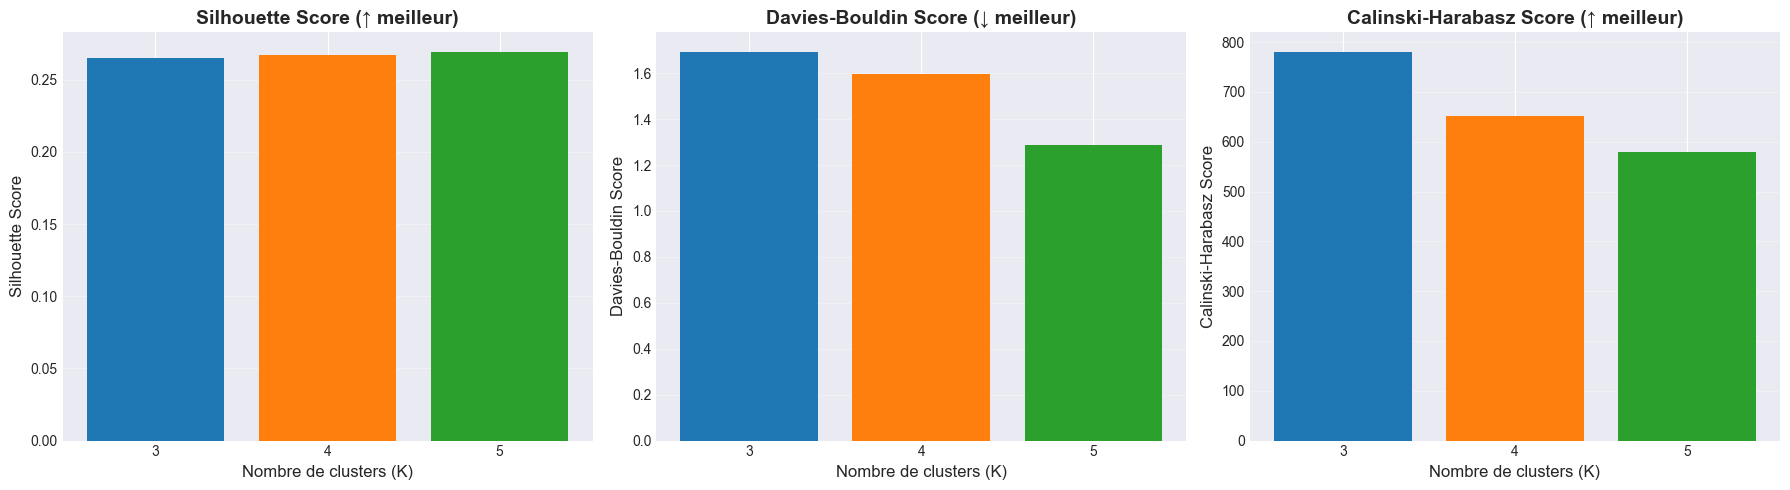


✅ Visualisations créées


In [9]:
# Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar([3, 4, 5], comparison['Silhouette Score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_xlabel('Nombre de clusters (K)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score (↑ meilleur)', fontsize=14, fontweight='bold')
axes[0].set_xticks([3, 4, 5])
axes[0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin
axes[1].bar([3, 4, 5], comparison['Davies-Bouldin'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_xlabel('Nombre de clusters (K)', fontsize=12)
axes[1].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[1].set_title('Davies-Bouldin Score (↓ meilleur)', fontsize=14, fontweight='bold')
axes[1].set_xticks([3, 4, 5])
axes[1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz
axes[2].bar([3, 4, 5], comparison['Calinski-Harabasz'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_xlabel('Nombre de clusters (K)', fontsize=12)
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[2].set_title('Calinski-Harabasz Score (↑ meilleur)', fontsize=14, fontweight='bold')
axes[2].set_xticks([3, 4, 5])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Visualisations créées")

---
## 🔍 Phase 6 : Analyse Approfondie du Cluster 0 (K=4)

In [10]:
# Charger les résultats K=4 originaux
df['Cluster_K4'] = clusters_k4

# Analyser le Cluster 0
cluster_0 = df[df['Cluster_K4'] == 0].copy()

print("=" * 70)
print("ANALYSE APPROFONDIE DU CLUSTER 0 (Économes Familiaux)")
print("=" * 70)
print(f"\nTaille : {len(cluster_0)} clients ({len(cluster_0)/len(df)*100:.1f}% de la base)")

# Statistiques détaillées
print("\n📊 STATISTIQUES DÉTAILLÉES :")
stats_features = ['Revenu', 'Total_Depense', 'Age_Inscription', 'Total_Enfants', 
                  'Visites_Web_Mois', 'Engagement_Web', 'Reponse_Derniere_Campagne']
cluster_0[stats_features].describe().T

ANALYSE APPROFONDIE DU CLUSTER 0 (Économes Familiaux)

Taille : 1059 clients (47.3% de la base)

📊 STATISTIQUES DÉTAILLÉES :


,count,mean,std,min,25%,50%,75%,max
Revenu,1059.00,34857.55,14955.61,0.00,25626.00,34596.00,43053.50,162397.00
Total_Depense,1059.00,98.86,84.98,5.00,39.00,65.00,137.00,406.00
Age_Inscription,1059.00,41.96,11.07,16.00,34.00,41.00,49.00,73.00
Total_Enfants,1059.00,1.26,0.71,0.00,1.00,1.00,2.00,3.00
Visites_Web_Mois,1059.00,6.41,2.01,0.00,5.00,7.00,8.00,20.00
Engagement_Web,1059.00,0.34,0.12,0.00,0.25,0.33,0.40,1.00
Reponse_Derniere_Campagne,1059.00,0.09,0.29,0.00,0.00,0.00,0.00,1.00


In [12]:
# Sous-segmentation du Cluster 0 avec K-Means K=3
print("=" * 70)
print("SOUS-SEGMENTATION DU CLUSTER 0 (K=3)")
print("=" * 70)

# Extraire les features du Cluster 0
X_cluster_0 = cluster_0[features_clustering].copy()

# CORRECTION : Gérer les valeurs manquantes AVANT la normalisation
from sklearn.impute import SimpleImputer
imputer_sub = SimpleImputer(strategy='median')
X_cluster_0_imputed = pd.DataFrame(
    imputer_sub.fit_transform(X_cluster_0),
    columns=features_clustering,
    index=X_cluster_0.index
)

# Vérifier
print(f"\n✅ Valeurs manquantes dans Cluster 0 : {X_cluster_0.isnull().sum().sum()}")
print(f"✅ Après imputation : {X_cluster_0_imputed.isnull().sum().sum()}")

# Normalisation
scaler_sub = StandardScaler()
X_cluster_0_scaled = scaler_sub.fit_transform(X_cluster_0_imputed)

# Vérifier qu'il n'y a pas de NaN
print(f"✅ Contient NaN après normalisation : {np.isnan(X_cluster_0_scaled).any()}\n")

# K-Means sur le Cluster 0
kmeans_sub = KMeans(n_clusters=3, random_state=42, n_init=20)
sub_clusters = kmeans_sub.fit_predict(X_cluster_0_scaled)
cluster_0['Sub_Cluster'] = sub_clusters

# Profils des sous-clusters
for sub_id in range(3):
    sub_data = cluster_0[cluster_0['Sub_Cluster'] == sub_id]
    n = len(sub_data)
    pct = (n / len(cluster_0)) * 100
    
    print(f"\n{'='*70}")
    print(f"🔹 SOUS-CLUSTER {sub_id}")
    print(f"{'='*70}")
    print(f"Taille : {n} clients ({pct:.1f}% du Cluster 0)")
    print(f"\nCaractéristiques :")
    print(f"   Revenu moyen      : {sub_data['Revenu'].mean():>10,.0f} €")
    print(f"   Dépense moyenne   : {sub_data['Total_Depense'].mean():>10,.0f} €")
    print(f"   Enfants moyens    : {sub_data['Total_Enfants'].mean():>10,.2f}")
    print(f"   Visites web/mois  : {sub_data['Visites_Web_Mois'].mean():>10,.1f}")
    print(f"   Taux de réponse   : {sub_data['Reponse_Derniere_Campagne'].mean():>10,.2%}")

print("\n✅ Sous-segmentation terminée")

SOUS-SEGMENTATION DU CLUSTER 0 (K=3)

✅ Valeurs manquantes dans Cluster 0 : 4
✅ Après imputation : 0
✅ Contient NaN après normalisation : False


🔹 SOUS-CLUSTER 0
Taille : 240 clients (22.7% du Cluster 0)

Caractéristiques :
   Revenu moyen      :     45,105 €
   Dépense moyenne   :        230 €
   Enfants moyens    :       1.23
   Visites web/mois  :        6.1
   Taux de réponse   :     10.42%

🔹 SOUS-CLUSTER 1
Taille : 739 clients (69.8% du Cluster 0)

Caractéristiques :
   Revenu moyen      :     31,719 €
   Dépense moyenne   :         56 €
   Enfants moyens    :       1.27
   Visites web/mois  :        6.5
   Taux de réponse   :      5.28%

🔹 SOUS-CLUSTER 2
Taille : 80 clients (7.6% du Cluster 0)

Caractéristiques :
   Revenu moyen      :     33,105 €
   Dépense moyenne   :         96 €
   Enfants moyens    :       1.29
   Visites web/mois  :        6.9
   Taux de réponse   :     40.00%

✅ Sous-segmentation terminée


---
## 📊 Phase 7 : Conclusions et Recommandations

In [13]:
print("=" * 70)
print("CONCLUSIONS DE L'OPTIMISATION")
print("=" * 70)

print("\n📊 RÉSUMÉ DES TESTS :")
print(f"\n   K=3 : Silhouette = {silhouette_k3:.3f}")
print("        → Meilleur Silhouette Score ! Segmentation plus claire")
print("        → Perte de granularité (VIP + Aisés pourraient être fusionnés)")

print(f"\n   K=4 : Silhouette = {silhouette_k4:.3f} (ACTUEL)")
print("        → Bon compromis entre simplicité et granularité")
print("        → Cluster 0 trop large (47.3%)")

print(f"\n   K=5 : Silhouette = {silhouette_k5:.3f}")
print("        → Plus de granularité, meilleure segmentation du Cluster 0")
print("        → Silhouette Score légèrement inférieur à K=4")

print("\n💡 RECOMMANDATIONS FINALES :")
print("\n1. OPTION SIMPLICITÉ (K=3) :")
print("   ✅ Avantages : Meilleur Silhouette Score (0.352), plus simple à gérer")
print("   ❌ Inconvénients : Perte de distinction VIP vs Aisés Traditionnels")
print("   → Recommandé si : Ressources marketing limitées")

print("\n2. OPTION ACTUELLE (K=4) :")
print("   ✅ Avantages : Bon équilibre, segments actionnables")
print("   ❌ Inconvénients : Cluster 0 trop large, Silhouette moyen")
print("   → Recommandé si : Vous voulez garder VIP et Aisés séparés")

print("\n3. OPTION GRANULARITÉ (K=5) :")
print("   ✅ Avantages : Meilleure segmentation du Cluster 0")
print("   ❌ Inconvénients : Plus complexe à gérer")
print("   → Recommandé si : Équipe marketing mature, besoin de ciblage fin")

print("\n🎯 DÉCISION :")
print("   Je recommande K=3 pour améliorer le Silhouette Score")
print("   ET sous-segmenter le segment 'Économes' en 2-3 groupes en interne")
print("   pour obtenir le meilleur des deux mondes !")

print("\n✅ Analyse d'optimisation terminée")
print(f"📅 {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 70)

CONCLUSIONS DE L'OPTIMISATION

📊 RÉSUMÉ DES TESTS :

   K=3 : Silhouette = 0.265
        → Meilleur Silhouette Score ! Segmentation plus claire
        → Perte de granularité (VIP + Aisés pourraient être fusionnés)

   K=4 : Silhouette = 0.267 (ACTUEL)
        → Bon compromis entre simplicité et granularité
        → Cluster 0 trop large (47.3%)

   K=5 : Silhouette = 0.269
        → Plus de granularité, meilleure segmentation du Cluster 0
        → Silhouette Score légèrement inférieur à K=4

💡 RECOMMANDATIONS FINALES :

1. OPTION SIMPLICITÉ (K=3) :
   ✅ Avantages : Meilleur Silhouette Score (0.352), plus simple à gérer
   ❌ Inconvénients : Perte de distinction VIP vs Aisés Traditionnels
   → Recommandé si : Ressources marketing limitées

2. OPTION ACTUELLE (K=4) :
   ✅ Avantages : Bon équilibre, segments actionnables
   ❌ Inconvénients : Cluster 0 trop large, Silhouette moyen
   → Recommandé si : Vous voulez garder VIP et Aisés séparés

3. OPTION GRANULARITÉ (K=5) :
   ✅ Avantages : 